In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data dictionary

|Table|Field|Description|
|:----|:----|:----------|
|orders|order_id|Unique idenfier for each order placed by a table|
|orders|date|Data the order was placed (entered into the system prior to cooking & serving)|
|order|time|Time the order was placed (entered into the system prior to cooking & serving)|
|order_details|order_details_id|Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
|order_details|order_id|Foreign key that ties the details in each order to the order itself|
|order_details|pizza_id|Foreign key that ties the pizza ordered to its details, like size and price|
|order_details|quantity|Quantity ordered for each pizza of the same type and size|
|pizzas|pizza_id|Unique identifier for each pizza (constituted by its type and size)|
|pizzas|pizza_type_id|Foreign key that ties each pizza to its broader pizza type|
|pizzas|size|Size of the pizza (Small, Medium, Large, X Large, or XX Large)|
|pizzas|price|Price of the pizza in USD|
|pizza_types|pizza_type_id|Unique identifier for each pizza type|
|pizza_types|name|Name of the pizza as shown in the menu|
|pizza_types|category|Category that the pizza fall under in the menu (Classic, Chicken, Supreme, or Veggie)|
|pizza_types|ingredients|Comma-delimited ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)|

# Importing the datasets

In [3]:
orders = pd.read_csv(
    'orders.csv',
    index_col='order_id', parse_dates = [['date', 'time']]                
)
orders.tail()

,date_time
order_id,
21346,2015-12-31 20:51:07
21347,2015-12-31 21:14:37
21348,2015-12-31 21:23:10
21349,2015-12-31 22:09:54
21350,2015-12-31 23:02:05


In [4]:
order_details = pd.read_csv(
    'order_details.csv', 
    index_col = 'order_details_id'
)
order_details.tail()

,order_id,pizza_id,quantity
order_details_id,,,
48616,21348,ckn_alfredo_m,1
48617,21348,four_cheese_l,1
48618,21348,napolitana_s,1
48619,21349,mexicana_l,1
48620,21350,bbq_ckn_s,1


In [5]:
pizzas = pd.read_csv(
    'pizzas.csv', 
    index_col = 'pizza_id'
)
pizzas.tail()

,pizza_type_id,size,price
pizza_id,,,
spinach_fet_m,spinach_fet,M,16.00
spinach_fet_l,spinach_fet,L,20.25
veggie_veg_s,veggie_veg,S,12.00
veggie_veg_m,veggie_veg,M,16.00
veggie_veg_l,veggie_veg,L,20.25


In [6]:
pizza_types = pd.read_csv(
    'pizza_types.csv',
    encoding='latin', index_col = 'pizza_type_id'
)
pizza_types.tail()

,name,category,ingredients
pizza_type_id,,,
mediterraneo,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
spin_pesto,The Spinach Pesto Pizza,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


# Exploratory Data Analysis (EDA)

## The orders DataFrame

- The orders DataFrame has 21.350 observations.
- There is not null values in the DataFrame.

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 1 to 21350
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  21350 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 333.6 KB


- There is not duplicates values in the DataFrame.

In [8]:
orders.duplicated().sum()

0

- The "month", "day", "hour" and "week" columns were added to the DataFrame.

In [9]:
orders['month'] = orders['date_time'].dt.month_name()
orders['day'] = orders['date_time'].dt.day_name()
orders['hour'] = orders['date_time'].dt.hour
orders['week'] = orders['date_time'].dt.isocalendar().week
orders.head()

,date_time,month,day,hour,week
order_id,,,,,
1,2015-01-01 11:38:36,January,Thursday,11,1
2,2015-01-01 11:57:40,January,Thursday,11,1
3,2015-01-01 12:12:28,January,Thursday,12,1
4,2015-01-01 12:16:31,January,Thursday,12,1
5,2015-01-01 12:21:30,January,Thursday,12,1


- The orders DataFrame has a memory usage of 3.2 MB.

In [10]:
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 1 to 21350
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  21350 non-null  datetime64[ns]
 1   month      21350 non-null  object        
 2   day        21350 non-null  object        
 3   hour       21350 non-null  int32         
 4   week       21350 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(1), object(2)
memory usage: 3.1 MB


- The **"month"** and **"day"**columns have a memory usage of **2.72 MB** approximately.

In [11]:
orders.memory_usage(deep = True)

Index         170800
date_time     170800
month        1347224
day          1369889
hour           85400
week          106750
dtype: int64

- The "month" and "day" columns have few unique values. 
    - These columns are good candidates to be converted to a categorical data type.

In [12]:
orders.nunique()

date_time    21350
month           12
day              7
hour            15
week            53
dtype: int64

- The **month** and **day** columns were converted to a categorical data type.
    - These columns now can be sorted properly.

In [13]:
orders['month'] = pd.Categorical(
    values = orders['month'], 
    categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered = True
)

In [14]:
orders['day'] = pd.Categorical(
    values = orders['day'],
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered = True
)

- The memory usage in the orders DataFrame was optimized (648.1 KB).

In [15]:
orders.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 1 to 21350
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  21350 non-null  datetime64[ns]
 1   month      21350 non-null  category      
 2   day        21350 non-null  category      
 3   hour       21350 non-null  int32         
 4   week       21350 non-null  UInt32        
dtypes: UInt32(1), category(2), datetime64[ns](1), int32(1)
memory usage: 564.7 KB


## The order_details DataFrame

- The order_details DataFrame has 48.620 observations.
- There is not null values in the DataFrame.

In [16]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 1 to 48620
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  48620 non-null  int64 
 1   pizza_id  48620 non-null  object
 2   quantity  48620 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


- There is not duplicates values in the DataFrame.

In [17]:
order_details.duplicated().sum()

0

## The pizzas DataFrame

- The pizzas DataFrame has 96 observations.
- There is no null values in the DataFrame.

In [18]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, bbq_ckn_s to veggie_veg_l
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_type_id  96 non-null     object 
 1   size           96 non-null     object 
 2   price          96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


- There is not duplicates values in the DataFrame.

In [19]:
pizzas.duplicated().sum()

0

- The "size" column is a good candidate to be converted to a categical data type.

In [20]:
pizzas.nunique()

pizza_type_id    32
size              5
price            27
dtype: int64

- The "size" column can be sorted properly.

In [21]:
pizzas['size'].unique()

array(['S', 'M', 'L', 'XL', 'XXL'], dtype=object)

In [22]:
pizzas['size'] = pd.Categorical(
    values = pizzas['size'],
    categories = ['S', 'M', 'L', 'XL', 'XXL'],
    ordered = True
)

## The pizza_types DataFrame

- The pizza_types DataFrame has 32 observations.
- The is not null values in the DataFrame.

In [23]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, bbq_ckn to veggie_veg
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         32 non-null     object
 1   category     32 non-null     object
 2   ingredients  32 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


- The is not duplicates values in the DataFrame.

In [24]:
pizza_types.duplicated().sum()

0

- The "name" and "category" columns are good candidates to be converted to a categorical data type. 

In [25]:
pizza_types.nunique()

name           32
category        4
ingredients    32
dtype: int64

- The "name" and "category" columns were converted to a categorical data type.
    - These columns have nominal data, this is why are not ordered in a hierarchy.

In [26]:
pizza_types['category'] = pd.Categorical(
    values = pizza_types['category']
)

In [27]:
pizza_types['name'] = pd.Categorical(
    values = pizza_types['name']
)

- The 'Pizza' string was chop off from the values in the "name" column.

In [28]:
pizza_types['name'].unique()

['The Barbecue Chicken Pizza', 'The California Chicken Pizza', 'The Chicken Alfredo Pizza', 'The Chicken Pesto Pizza', 'The Southwest Chicken Pizza', ..., 'The Mediterranean Pizza', 'The Mexicana Pizza', 'The Spinach Pesto Pizza', 'The Spinach and Feta Pizza', 'The Vegetables + Vegetables Pizza']
Length: 32
Categories (32, object): ['The Barbecue Chicken Pizza', 'The Big Meat Pizza', 'The Brie Carre Pizza', 'The Calabrese Pizza', ..., 'The Spinach Supreme Pizza', 'The Spinach and Feta Pizza', 'The Thai Chicken Pizza', 'The Vegetables + Vegetables Pizza']

In [29]:
pizza_types['name'] = pizza_types['name'].str.replace(pat = 'Pizza', repl = '')

In [30]:
pizza_types['name'].unique()

array(['The Barbecue Chicken ', 'The California Chicken ',
       'The Chicken Alfredo ', 'The Chicken Pesto ',
       'The Southwest Chicken ', 'The Thai Chicken ', 'The Big Meat ',
       'The Classic Deluxe ', 'The Hawaiian ', 'The Italian Capocollo ',
       'The Napolitana ', 'The Pepperoni, Mushroom, and Peppers ',
       'The Pepperoni ', 'The Greek ', 'The Brie Carre ',
       'The Calabrese ', 'The Italian Supreme ', 'The Pepper Salami ',
       'The Prosciutto and Arugula ', 'The Sicilian ', 'The Soppressata ',
       'The Spicy Italian ', 'The Spinach Supreme ', 'The Five Cheese ',
       'The Four Cheese ', 'The Green Garden ', 'The Italian Vegetables ',
       'The Mediterranean ', 'The Mexicana ', 'The Spinach Pesto ',
       'The Spinach and Feta ', 'The Vegetables + Vegetables '],
      dtype=object)

## The maven_pizza DataFrame

- The maven_pizza DataFrame is a big DataFrame that contains all the information from the 4 DataFrames analyzed above.

In [31]:
maven_pizza = order_details.merge(right = orders, how = 'inner', on = 'order_id')
maven_pizza = maven_pizza.merge(right = pizzas, how = 'left', on = 'pizza_id')
maven_pizza = maven_pizza.merge(right = pizza_types, how = 'left', on = 'pizza_type_id')

In [32]:
maven_pizza.index.names = ['maven_id']

- To find the revenue from sales, the "revenue" column is added to the maven_pizza DataFrame by multiplying the "quantity" column by the "price" column.

In [33]:
maven_pizza['revenue'] = maven_pizza['quantity'] * maven_pizza['price']

In [34]:
maven_pizza.tail()

,order_id,pizza_id,quantity,date_time,month,day,hour,week,pizza_type_id,size,price,name,category,ingredients,revenue
maven_id,,,,,,,,,,,,,,,
48615,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,December,Thursday,21,53,ckn_alfredo,M,16.75,The Chicken Alfredo,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75
48616,21348,four_cheese_l,1,2015-12-31 21:23:10,December,Thursday,21,53,four_cheese,L,17.95,The Four Cheese,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95
48617,21348,napolitana_s,1,2015-12-31 21:23:10,December,Thursday,21,53,napolitana,S,12.00,The Napolitana,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00
48618,21349,mexicana_l,1,2015-12-31 22:09:54,December,Thursday,22,53,mexicana,L,20.25,The Mexicana,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25
48619,21350,bbq_ckn_s,1,2015-12-31 23:02:05,December,Thursday,23,53,bbq_ckn,S,12.75,The Barbecue Chicken,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",12.75


# Questions to answer

## 1. What days and times do we tend to be busiest?

- The picture below shows the number of total pizzas ordered by day of the week:
    - **Thursday, Friday and Saturday** are the **busiest days of the week** with 7,478, 8,242 and 7,493 pizzas ordered respectively.

In [35]:
busiest_days = maven_pizza.groupby(by = 'day', as_index = False)['quantity'].sum()

In [36]:
color_graph = '#118DFF'

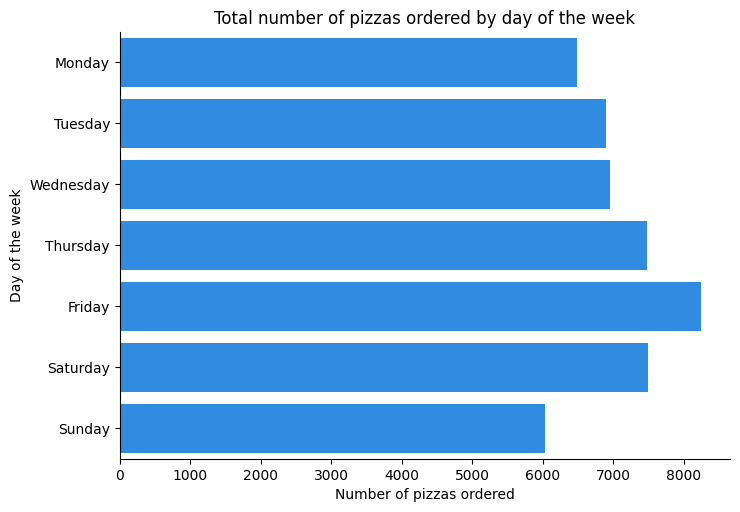

In [37]:
g = sns.catplot(data = busiest_days, x = 'quantity', y = 'day', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Total number of pizzas ordered by day of the week')
g.set(xlabel = 'Number of pizzas ordered', ylabel = 'Day of the week')
plt.show()

- The picture below shows the total number of pizzas ordered by hour of the day:
    - The **busiest hours of the day** is **between 12:00 and 14:00** and **between 17:00 and 19:00**.

In [38]:
busiest_hours = maven_pizza.groupby('hour', as_index = False)['quantity'].sum()

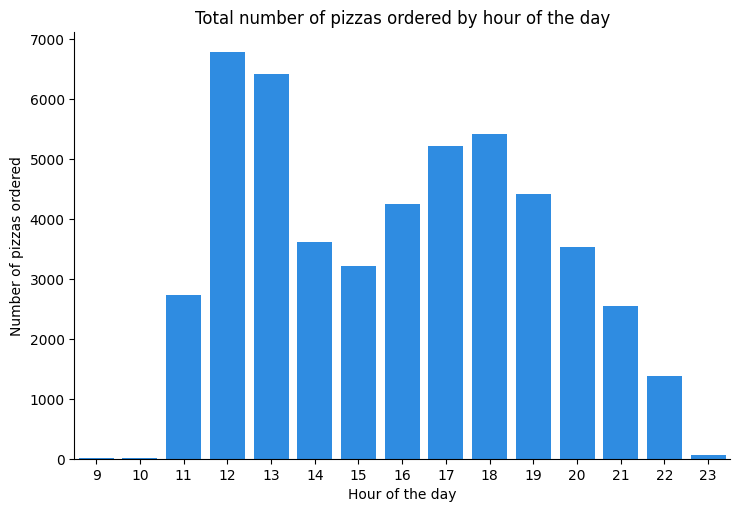

In [39]:
g = sns.catplot(data = busiest_hours, x = 'hour', y = 'quantity', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Total number of pizzas ordered by hour of the day')
g.set(xlabel = 'Hour of the day', ylabel = 'Number of pizzas ordered')
plt.show()

## 2. How many pizzas are we making during peak periods?

- Plato's Pizza made 13,189 pizzas in total during peak periods.

In [40]:
busiest_hours['quantity'].nlargest(n = 2).sum()

13189

(missing)

In [41]:
pizzas_by_week_day_hour = maven_pizza.groupby(['week', 'day', 'hour'], as_index = False)['quantity'].sum()

In [42]:
pizzas_by_week_day = pizzas_by_week_day_hour.groupby(['week', 'day'], as_index = False)['quantity'].sum()

In [43]:
avg_pizzas_by_day = pizzas_by_week_day.groupby('day', as_index = False)['quantity'].agg({'median': 'median', 'average': 'mean', 'std': 'std'})

(missing)

In [44]:
peak_hours = maven_pizza['hour'].isin([12, 13, 17, 18])

In [45]:
pizzas_by_week_day_hour_peak = maven_pizza[peak_hours].groupby(by = ['week', 'day', 'hour'], as_index = False)['quantity'].sum()

In [46]:
pizzas_by_week_day_peak = pizzas_by_week_day_hour_peak.groupby(by = ['week', 'day'], as_index = False)['quantity'].sum()

In [47]:
avg_pizzas_by_day_peak = pizzas_by_week_day_peak.groupby(by = 'day', as_index = False)['quantity'].agg({'median_peak': 'median', 'average_peak': 'mean', 'std_peak': 'std'})

In [48]:
avg_pizzas_by_day['median_peak'] = avg_pizzas_by_day_peak['median_peak']
avg_pizzas_by_day['average_peak'] = avg_pizzas_by_day_peak['average_peak']
avg_pizzas_by_day['std_peak'] = avg_pizzas_by_day_peak['std_peak']

- The picture below shows the average of pizzas made by day of the week:
    - (missing)

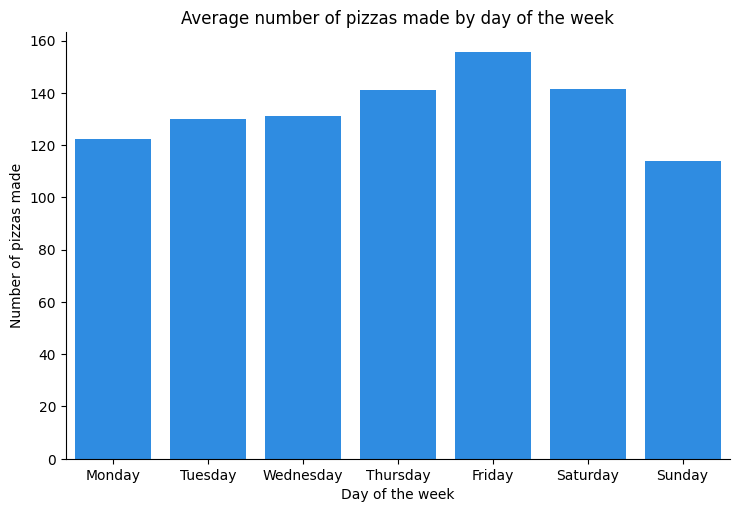

In [49]:
g = sns.catplot(data = avg_pizzas_by_day, x = 'day', y = 'average', kind = 'bar', color = color_graph, aspect = 1.5)
# g = sns.barplot(data = avg_pizzas_by_day, x = 'day', y = 'average_peak', color = 'blue')
g.set(title = 'Average number of pizzas made by day of the week')
g.set(xlabel = 'Day of the week', ylabel = 'Number of pizzas made')
plt.show()

- Plato's Pizza makes an **average of 64 pizzas during peak periods in a day of the week** with a standard deviation of 20 pizzas. 

In [50]:
math.floor(pizzas_by_week_day_peak['quantity'].mean()) # Value is round down

64

In [51]:
math.floor(pizzas_by_week_day_peak['quantity'].std()) # Value is round down

20

## 3. What are our best and worst selling pizzas?

- The picture bellows shows the **top 5 best selling pizzas** : 
    - The Thai Chicken pizza (43,434 us dollars)
    - The Barbecue Chicken pizza (42,768 us dollars)
    - The California Chicken pizza (41,409 us dollars)
    - The Classic Deluxe pizza (38,180 us dollars)
    - The Spicy Italian pizza (34,831 us dollars)

In [52]:
revenue_by_name = maven_pizza.groupby(by = 'name', as_index = False)['revenue'].sum().sort_values(by = 'revenue')

In [53]:
top5_best_selling = revenue_by_name.nlargest(columns = 'revenue', n = 5)

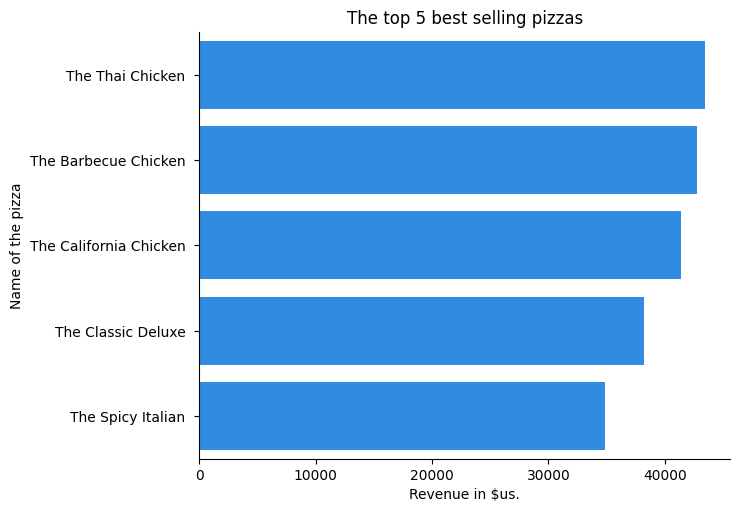

In [54]:
g = sns.catplot(data = top5_best_selling, x = 'revenue', y = 'name', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'The top 5 best selling pizzas')
g.set(xlabel = 'Revenue in $us.', ylabel = 'Name of the pizza')
plt.show()

- The picture bellows shows the **top 5 worst selling pizzas**: 
    - The Brie Carre pizza (11,589 us dollars)
    - The Green Garden pizza (13,956 us dollars)
    - The Spinach Supreme pizza (15,278 us dollars)
    - The Mediterranean pizza (15,361 us dollars)
    - The Spinach Pesto pizza (15,596 us dollars)

In [55]:
top5_worst_selling = revenue_by_name.nsmallest(n = 5, columns = 'revenue')

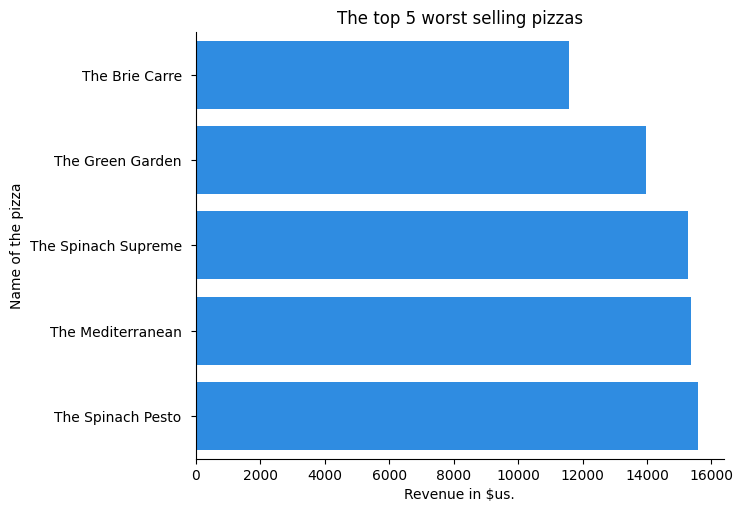

In [56]:
g = sns.catplot(data = top5_worst_selling, x = 'revenue', y = 'name', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'The top 5 worst selling pizzas')
g.set(xlabel = 'Revenue in $us.', ylabel = 'Name of the pizza')
plt.show()

- The picture below shows the total revenue by size of the pizza:
    - The **Large size** is the **best selling size pizza** (375,319 us dollars).
    - The **XX Large size** and the **X Large size** are the **worst selling size pizzas** (1,007 and 14,076 us dollars respectively). 

In [57]:
revenue_by_size =maven_pizza.groupby(by = 'size', as_index = False)['revenue'].sum()

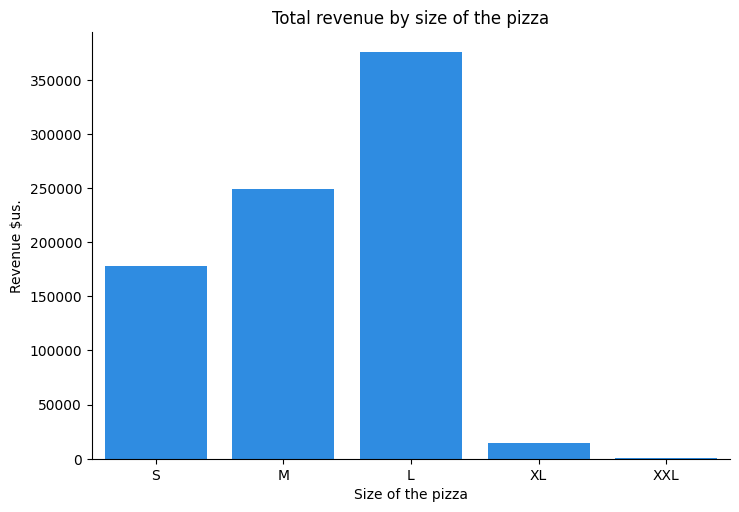

In [58]:
g = sns.catplot(data = revenue_by_size, x = 'size', y = 'revenue', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Total revenue by size of the pizza')
g.set(xlabel = 'Size of the pizza', ylabel = 'Revenue $us.')
plt.show()

## 4. What's our average order value?

- The picture below shows the average number of orders by day of the week.
    - **Friday** is the day of the week with the **highest average order value** (66 orders)
    - **Sunday** is the day of the week with the **lowest average order value** (49 orders)

In [59]:
orders_by_week_day = orders.groupby(by = ['week', 'day'], as_index = False)['date_time'].count()

In [60]:
orders_by_week_day = orders_by_week_day.rename(columns = {'date_time': 'count'})

In [61]:
avg_orders_by_day = orders_by_week_day.groupby(by = 'day', as_index = False)['count'].mean()

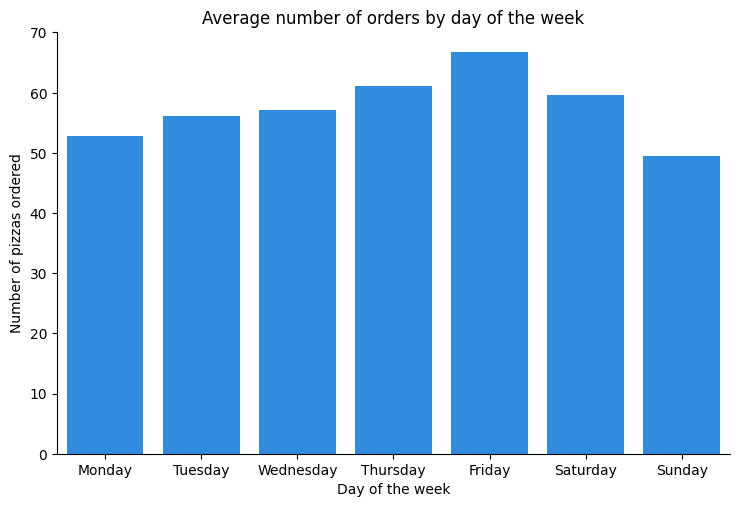

In [62]:
g = sns.catplot(data = avg_orders_by_day, x = 'day', y = 'count', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Average number of orders by day of the week')
g.set(xlabel = 'Day of the week', ylabel = 'Number of pizzas ordered')
plt.show()

- Plato's Pizzea has an **average of 57 orders in a day of the week** with a standard deviation of 14 orders.

In [63]:
math.floor(orders_by_week_day['count'].mean()) # Value is round down

57

In [64]:
math.floor(orders_by_week_day['count'].std()) # Value is round down

14

- The picture below shows the average number of orders by hour of the day.
    - "12:00" is the hour of the day with the **highest average order value** (7 orders)
    - "09:00, 10:00 and 23:00" are the hours of the day with the **lowest average order values** (1 order)

In [65]:
orders_by_hours = orders.groupby(by = ['week', 'day', 'hour'], as_index = False)['date_time'].count()

In [66]:
orders_by_hours = orders_by_hours.rename(columns = {'date_time': 'count'})

In [67]:
avg_orders_by_hours = orders_by_hours.groupby(by = 'hour', as_index = False)['count'].mean()

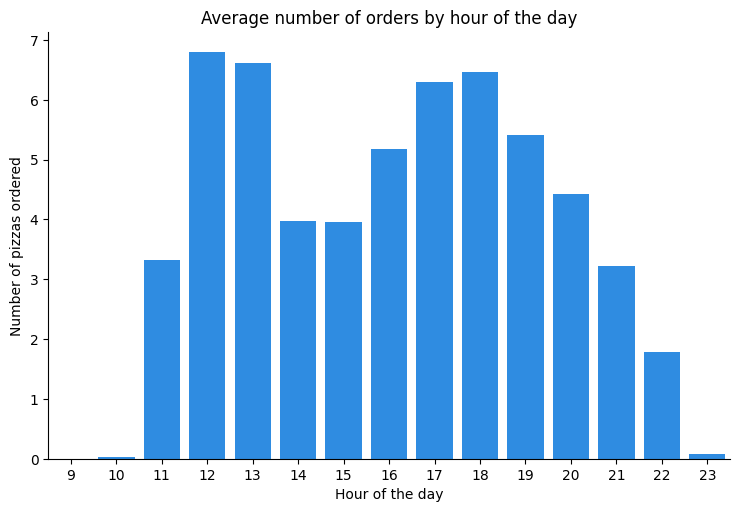

In [68]:
g = sns.catplot(data = avg_orders_by_hours, x = 'hour', y = 'count', kind = 'bar', color = color_graph, aspect = 1.5)
g.set(title = 'Average number of orders by hour of the day')
g.set(xlabel = 'Hour of the day', ylabel = 'Number of pizzas ordered')
plt.show()

- Plato's Pizza has an **average of 3 orders in one hour of the day** with a standard deviation of 3 orders.

In [69]:
math.floor(orders_by_hours['count'].mean()) # Value is round down

3

In [70]:
math.floor(orders_by_hours['count'].std()) # Value is round down

3